In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from numpy.linalg import matrix_power
from numpy import linalg


In [28]:
# Construct the transfer matrix at temperature T with external field B
J = 1.0
kB = 2.0
def transfer_matrix(T, B):
    beta = 1/(kB*T)
    return np.array ([[np.exp(beta*J+beta*B), np.exp(-beta*J)],
                     [np.exp(-beta*J), np.exp(beta*J-beta*B)]])

T = transfer_matrix(1, 0)
print(format(T))

[[1.19124622 0.99170129]
 [0.99170129 0.85356521]]


In [98]:
#Find the eivenvalues of the transfer matrix and compare to the exact results.
T=1
B=1
[l1, l2],_ =np.linalg.eig(transfer_matrix(T,B))
def exact(T, B):
    beta = 1/(kB*T)
    l1_exact = np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    l2_exact = np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    return l1_exact, l2_exact

l1_exact, l2_exact = exact(T, B)
print ("transfer matrix", l1, l2)
print ('exact results', l1_exact, l2_exact)

transfer matrix 2.910807473398626 0.8074743550604188
exact results 2.910807473398626 0.8074743550604186


In [114]:
#Evaluate the partition function Z at different system size N and T, B. Compare to the exact results.
T=1
B=1
N=20
print('T=1 , B=1 , N=20')
def partition_func(T, B, N):
    U = transfer_matrix(T, B)
    Z = np.trace(np.linalg.matrix_power(U, N))
    return Z, 

print( partition_func(T, B, N))

def partition_func_exact(T, B, N):
    beta = 1 / (kB*T)
    Z = (np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(2*beta*J)*np.sinh(beta*B)**2 + np.exp(-2*beta*J)))**N
    return Z

print(partition_func_exact(T, B, N))



T=1 , B=1 , N=20
(1906644064.2873652,)
1906644064.2734787


In [115]:
print('T=5 , B=10 , N=15')
T=5
B=10
N=15

def partition_func(T, B, N):
    U = transfer_matrix(T, B)
    Z = np.trace(np.linalg.matrix_power(U, N))
    return Z, 

print(partition_func(T, B, N))

def partition_func_exact(T, B, N):
    beta = 1 / (kB*T)
    Z = (np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(2*beta*J)*np.sinh(beta*B)**2 + np.exp(-2*beta*J)))**N
    return Z

print(partition_func_exact(T, B, N))


T=5 , B=10 , N=15
(56823727.50093313,)
56823727.50093317


Text(0.5, 1.0, 'N = 100')

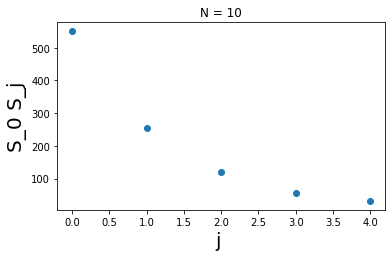

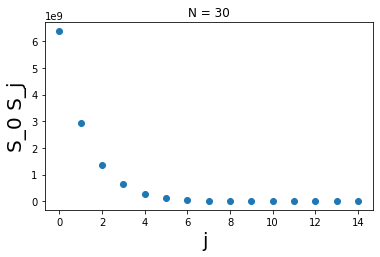

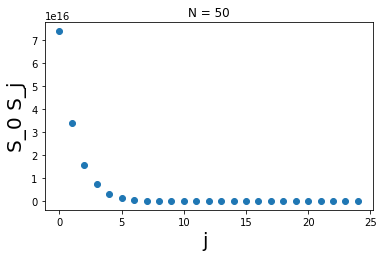

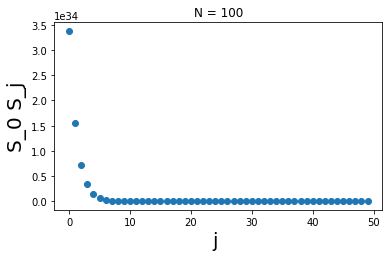

In [157]:
#For a fixed N, T, B, evaluate S_0 S_j where j=0,1,... N
#Plot S_0 S_j up to j=N/2 and show that it decays exponentially, try several N,B,T
def S0Sj(T, B, N, j):
    U = transfer_matrix(T, B)
    I = impurity_matrix()
    Z_S0Sj = I
    for i in range(N):
        Z = U @ U
        if i == j:
            Z_S0Sj = Z_S0Sj @ I @ U   
        else:
            Z_S0Sj = Z_S0Sj @ U
        S0Sj = np.trace(Z_S0Sj) / np.trace(Z)
    return S0Sj

def correlation_func(T, B, N):
    correlation_func = np.empty(0)
    for i in range(N//2):
        correlation_func = np.append(correlation_func, S0Sj(T, B, N, i))
    return correlation_func
N = 10
T = 1
B = 0
j = 10
plt.figure(figsize=(20, 20))
plt.subplot(5, 3, 1)
plt.plot(np.arange(N//2), correlation_func(T, B, N), 'o')
plt.xlabel('j ', fontsize=20) 
plt.ylabel('S_0 S_j', fontsize=20)
plt.title('N = 10')
N = 30
T = 1
B = 0
j = 10
plt.figure(figsize=(20, 20))
plt.subplot(5, 3, 1)
plt.plot(np.arange(N//2), correlation_func(T, B, N), 'o')
plt.xlabel('j ', fontsize=20) 
plt.ylabel('S_0 S_j', fontsize=20)
plt.title('N = 30')
N = 50
T = 1
B = 0
j = 10
plt.figure(figsize=(20, 20))
plt.subplot(5, 3, 2)
plt.plot(np.arange(N//2), correlation_func(T, B, N), 'o')
plt.xlabel('j ', fontsize=20) 
plt.ylabel('S_0 S_j', fontsize=20)
plt.title('N = 50')
N = 100
T = 1
B = 0
j = 10
plt.figure(figsize=(20, 20))
plt.subplot(5, 3, 3)
plt.plot(np.arange(N//2), correlation_func(T, B, N), 'o')
plt.xlabel('j ', fontsize=20) 
plt.ylabel('S_0 S_j', fontsize=20)
plt.title('N = 100')

Text(0.5, 1.0, 'N = 800')

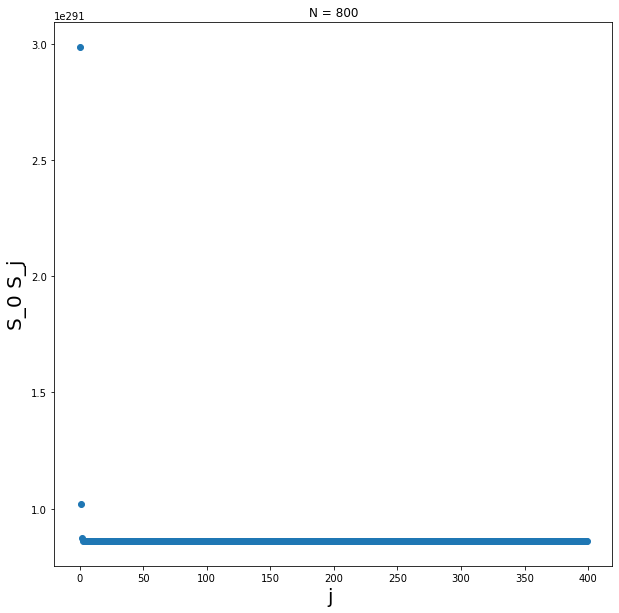

In [216]:
N = 800
T = 5
B = 5
j = 500
plt.figure(figsize=(10, 10))

plt.plot(np.arange(N//2), correlation_func(T, B, N), 'o')
plt.xlabel('j ', fontsize=20) 
plt.ylabel('S_0 S_j', fontsize=20)
plt.title('N = 800')

Text(0.5, 1.0, 'N = 100, T = 0.070513')

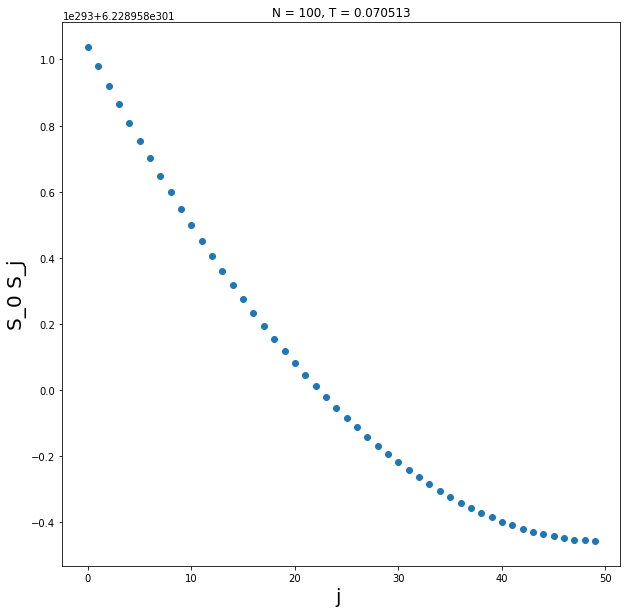

In [217]:
N = 100
T = 0.070513
B = 0
j = 1
plt.figure(figsize=(10, 10))

plt.plot(np.arange(N//2), correlation_func(T, B, N), 'o')
plt.xlabel('j ', fontsize=20) 
plt.ylabel('S_0 S_j', fontsize=20)
plt.title('N = 100, T = 0.070513')